<a href="https://colab.research.google.com/github/trived76/ECE1512-Homework2-Maharshi/blob/master/ECE1512_HOMEWORK2_by_MAHARSHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Expanded modelzoo is only available as of lucid v0.3
!pip install --quiet lucid==0.3

import numpy as np
import tensorflow as tf

from lucid.misc.io import show, load
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

## Understanding the effect of convolution operation of a filter


In [0]:
# import cv2
# img_temp=cv2.imread('filter_edge.tif', -cv2.IMREAD_ANYDEPTH)
# k = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

# from scipy import ndimage
# import matplotlib.pyplot as plt
# after_convol=ndimage.convolve(img_temp, k)
# plt.subplot(1,2,1)
# plt.imshow(img_temp,cmap="Greys_r")
# plt.axis('off')
# plt.subplot(1,2,2)
# plt.imshow(after_convol,cmap="Greys_r")
# plt.axis('off')

# Lucid Modelzoo

 [Lucid](https://github.com/tensorflow/lucid) is a library for visualizing neural networks.
 As of lucid v0.3, we provide a consistent API for interacting with 27 different vision models.



## General Setup

## Import Modelzoo

In [0]:
# Lucid's modelzoo can be accessed as classes in vision_models
import lucid.modelzoo.vision_models as models

# ... or throguh a more systematic factory API
import lucid.modelzoo.nets_factory as nets

## List Models

As of lucid v0.3

In [3]:
print ""
print "Model".ljust(27), " ", "Dataset"
print ""
for name, Model in nets.models_map.iteritems():
  print name.ljust(27), " ", Model.dataset


Model                         Dataset

PnasnetMobile_slim            ImageNet
PnasnetLarge_slim             ImageNet
InceptionV1_caffe_Places365   Places365
MobilenetV1_025_slim          ImageNet
AlexNet_caffe_Places365       Places365
NasnetMobile_slim             ImageNet
InceptionV2_slim              ImageNet
ResnetV1_101_slim             ImageNet
InceptionV1_caffe             ImageNet
InceptionResnetV2_slim        ImageNet
InceptionV3_slim              ImageNet
InceptionV1_caffe_Places205   Places205
InceptionV1_slim              ImageNet
ResnetV1_50_slim              ImageNet
CaffeNet_caffe                ImageNet
InceptionV4_slim              ImageNet
VGG19_caffe                   ImageNet
ResnetV1_152_slim             ImageNet
MobilenetV1_050_slim          ImageNet
NasnetLarge_slim              ImageNet
AlexNet                       ImageNet
ResnetV2_101_slim             ImageNet
ResnetV2_152_slim             ImageNet
MobilenetV1_slim              ImageNet
VGG16_caffe          

## List Model Layers

In [4]:
# Importing model of Inception model with modelzoo and lucid library

model = models.InceptionV1()
model.load_graphdef()

# Printing the layers and number of feature maps of the InceptionV1
models.InceptionV1.layers

[{'name': 'conv2d0', 'size': 64, 'type': 'conv'},
 {'name': 'conv2d1', 'size': 64, 'type': 'conv'},
 {'name': 'conv2d2', 'size': 192, 'type': 'conv'},
 {'name': 'mixed3a', 'size': 256, 'type': 'conv'},
 {'name': 'mixed3b', 'size': 480, 'type': 'conv'},
 {'name': 'mixed4a', 'size': 508, 'type': 'conv'},
 {'name': 'mixed4b', 'size': 512, 'type': 'conv'},
 {'name': 'mixed4c', 'size': 512, 'type': 'conv'},
 {'name': 'mixed4d', 'size': 528, 'type': 'conv'},
 {'name': 'mixed4e', 'size': 832, 'type': 'conv'},
 {'name': 'mixed5a', 'size': 832, 'type': 'conv'},
 {'name': 'mixed5b', 'size': 1024, 'type': 'conv'},
 {'name': 'head0_bottleneck', 'size': 128, 'type': 'conv'},
 {'name': 'nn0', 'size': 1024, 'type': 'dense'},
 {'name': 'softmax0', 'size': 1008, 'type': 'dense'},
 {'name': 'head1_bottleneck', 'size': 128, 'type': 'conv'},
 {'name': 'nn1', 'size': 1024, 'type': 'dense'},
 {'name': 'softmax1', 'size': 1008, 'type': 'dense'},
 {'name': 'softmax2', 'size': 1008, 'type': 'dense'}]

## Show Model Graph

In [5]:
# Observe the architecture of Inspection V1 or GoogLeNet
'''
From this graph, names of the node and kernels can be extracted. Connection and number of layers and neurons can also be understood with the help of this.
'''
model = models.InceptionV1()
model.load_graphdef()

model.show_graph()

## Getting started with Feature Visualization 
- In this section, Lucid library will be used to generate the feature visualization. Firstly, some of the first layer, middle layers and last layers **neurons** are visualized. 
- Secondly, neuron in whole feature maps or layers are maximize and feature maps are generated.
- Visualization is carried out with maximizing the activation function.

512 13.031564



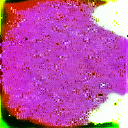

512 114.96871



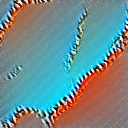

512 246.99153



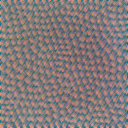

512 204.14319



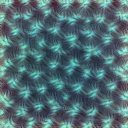

512 306.1178



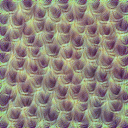

512 866.5934



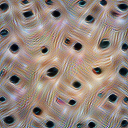

512 985.85626



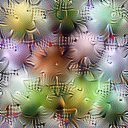

512 704.5012



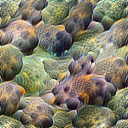

512 694.3482



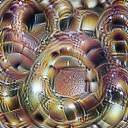

512 449.23315



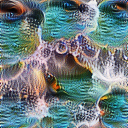

512 640.75757



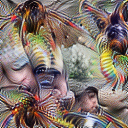

512 223.9925



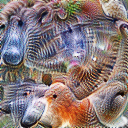

In [38]:
# Visualizing a neuron (in convolutional layers only)

_ = render.render_vis(model, "conv2d0_pre_relu:12") # Pre-relu
# _ = render.render_vis(model, "conv2d0:12") # Post-relu
# _ = render.render_vis(model, "maxpool0:12") # Maxpool
_ = render.render_vis(model, "conv2d1_pre_relu:12")
_ = render.render_vis(model, "conv2d2_pre_relu:12") 
_ = render.render_vis(model, "mixed3a_pre_relu:12") 
_ = render.render_vis(model, "mixed3b_pre_relu:12") 
_ = render.render_vis(model, "mixed4a_pre_relu:12") 
_ = render.render_vis(model, "mixed4b_pre_relu:12") 
_ = render.render_vis(model, "mixed4c_pre_relu:12") 
_ = render.render_vis(model, "mixed4d_pre_relu:12")
_ = render.render_vis(model, "mixed4e_pre_relu:12")
_ = render.render_vis(model, "mixed5a_pre_relu:12") 
_ = render.render_vis(model, "mixed5b_pre_relu:12") 

512 1400.3324



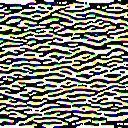

512 1107.7814



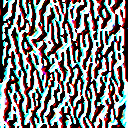

512 1477.3159



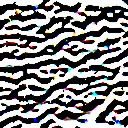

512 1534.3944



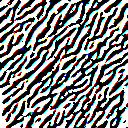

512 1411.3256



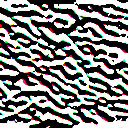

512 1855.4397



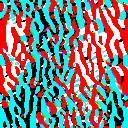

512 1684.801



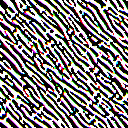

512 1059.3782



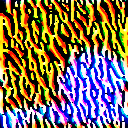

512 1163.0975



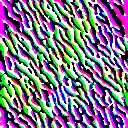

512 583.4634



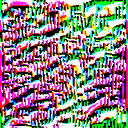

512 1185.8809



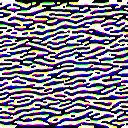

512 1802.8424



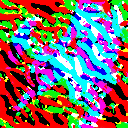

512 763.2056



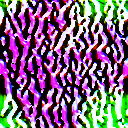

512 2127.4473



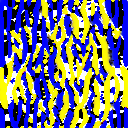

512 1459.7494



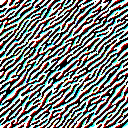

512 1037.387



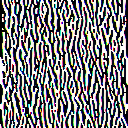

512 706.3145



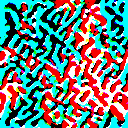

512 932.06244



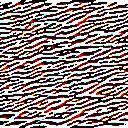

512 1201.4849



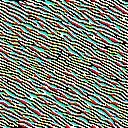

512 418.87396



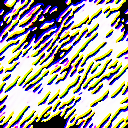

512 1095.9108



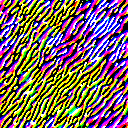

512 1005.15936



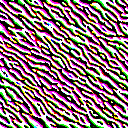

512 963.2235



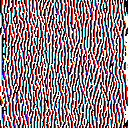

512 854.01



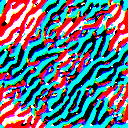

512 633.5262



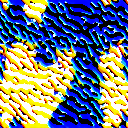

512 726.2514



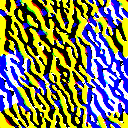

512 631.6398



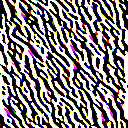

512 765.8533



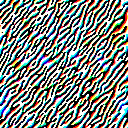

512 707.4609



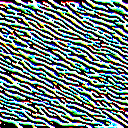

512 833.99976



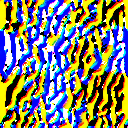

512 279.89203



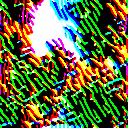

512 417.53387



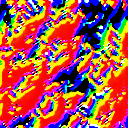

512 1720.4744



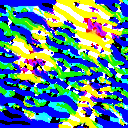


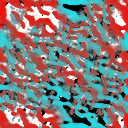


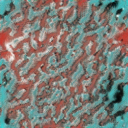


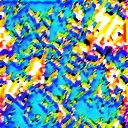

KeyboardInterrupt: ignored

In [24]:
# Visualizations for the first convolution layer : 64 Feature maps
for i,j in enumerate(models.InceptionV1.layers):
  if j['name'] is str('conv2d0'):
    for k in range(j['size']):
      obj = objectives.channel(str(j['name']), k)
      _ = render.render_vis(model, obj)

512 289.30557



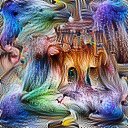

512 243.6227



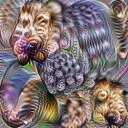

512 180.48059



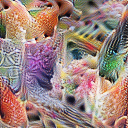

512 310.71396



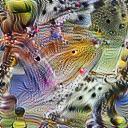

512 261.79385



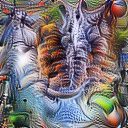

512 283.33618



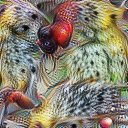

512 235.58148



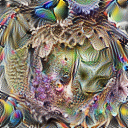

512 294.82257



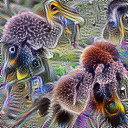


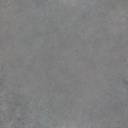

KeyboardInterrupt: ignored

In [26]:
# Visualizations for the last convolution layer : 1024 Feature maps
for i,j in enumerate(models.InceptionV1.layers):
  if j['name'] is str('mixed5b'):
    for k in range(j['size']):
      obj = objectives.channel(str(j['name']), k)
      _ = render.render_vis(model, obj)

512 2332.7842



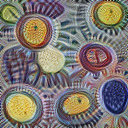

In [47]:
# Adding channels
channel = lambda n: objectives.channel("mixed4a_pre_relu", n)
obj = channel(476) + channel(465)
_ = render.render_vis(model, obj)

## Diversity

512 616.4913



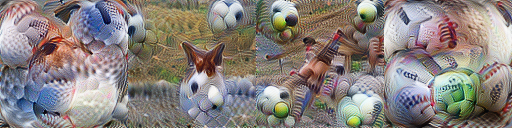

In [54]:
param_f = lambda: param.image(128, batch=4)
obj = objectives.channel("mixed5a_pre_relu", 9) - 1e2*objectives.diversity("mixed5a")
A = render.render_vis(model, obj, param_f)[0]

(-0.5, 127.5, 127.5, -0.5)

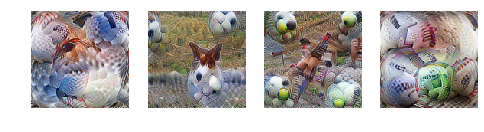

In [59]:
import matplotlib.pyplot as plt
plt.subplot(1,4,1)
plt.imshow(A[0,:,:,:])
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(A[1,:,:,:])
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(A[2,:,:,:])
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(A[3,:,:,:])
plt.axis('off')

## Combining Neurons or Objectives

In [0]:
neuron1 = ('mixed4b_pre_relu', 111)     # large fluffy
# neuron1 = ('mixed3a_pre_relu', 139)   # pointilist
# neuron1 = ('mixed3b_pre_relu',  81)   # brush trokes
# neuron1 = ('mixed4a_pre_relu',  97)   # wavy
# neuron1 = ('mixed4a_pre_relu',  41)   # frames
# neuron1 = ('mixed4a_pre_relu', 479)   # B/W

neuron2 = ('mixed4a_pre_relu', 476)     # art
# neuron2 = ('mixed4b_pre_relu', 360)   # lattices
# neuron2 = ('mixed4b_pre_relu', 482)   # arcs
# neuron2 = ('mixed4c_pre_relu', 440)   # small fluffy
# neuron2 = ('mixed4d_pre_relu', 479)   # bird beaks
# neuron2 = ('mixed4e_pre_relu', 718)   # shoulders

512 769.5383



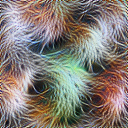

512 1148.2415



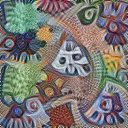

512 1188.6938



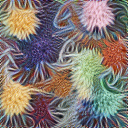

In [49]:
C = lambda neuron: objectives.channel(*neuron)

_ = render.render_vis(model, C(neuron1))
_ = render.render_vis(model, C(neuron2))
_ = render.render_vis(model, C(neuron1) + C(neuron2))

## Caricature

See the [inversion and caricature notebook](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/misc/feature_inversion_caricatures.ipynb) to learn more.


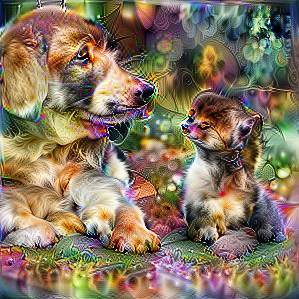

None


In [0]:
from lucid.recipes.caricature import feature_inversion

img = load("https://storage.googleapis.com/lucid-static/building-blocks/examples/dog_cat.png")

model = models.InceptionV4_slim()
model.load_graphdef()

result = feature_inversion(img, model, "InceptionV4/InceptionV4/Mixed_6b/concat", n_steps=512, cossim_pow=0.0)
show(result)